### PREDICTIVE ANALYTICS AND RECOMMENDATION SYSTEMS IN BANKING

#### Project objective
     This project is about predicting the Loan Defaults using Supervised Learning, Customer Segmentation using Unsupervised Learning and Recommending Bank Products through a Recommendation Engine.

In [2]:
#imports libraries
from faker import Faker
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### Data Collection

In [3]:
#generating synthetic data 
fake=Faker()

loan_types=['Personal', 'Business', 'Education', 'Auto', 'Mortgage']

product_names=['Savings Account', 'Checking Account', 'Credit Card', 'Personal Loan', 'Home Loan',
    'Auto Loan', 'Business Loan', 'Student Loan', 'Investment Fund', 'Retirement Plan',
    'Insurance Policy', 'Mutual Fund', 'Bond', 'Certificate of Deposit', 'Home Equity Line',
    'Mortgage Refinance', 'Business Credit Line', 'Auto Refinance', 'Home Improvement Loan',
    'Gold Loan', 'Cash Credit', 'Short-Term Loan', 'Long-Term Loan', 'Travel Loan',
    'Medical Loan', 'Emergency Loan', 'Holiday Loan', 'Debt Consolidation Loan', 'Small Business Loan',
    'Agricultural Loan', 'Technology Loan', 'Education Savings Plan', 'Wealth Management', 
    'Stock Investment', 'Real Estate Investment', 'International Investment', 'Fixed Deposit', 
    'Recurring Deposit', 'Loan Against Property', 'Gold Investment', 'Retirement Savings',
    'High-Yield Savings Account', 'Money Market Account', 'Insurance Savings', 'Pension Plan',
    'Child Education Fund', 'Healthcare Savings', 'Property Investment', 'Auto Insurance'
]

def data_col(n_records,n_customers=100,n_product=50,n_interactions=1000,csv_filename="dataset_revised1.CSV"):
    data=[]
    cus_ids=[f"C0{i+1}" for i in range(n_customers)]
    prod_ids=[f"P0{i+1}" for i in range(n_product)]

    prod_id_to_name={prod_ids[i]: product_names[i % len(product_names)] for i in range(n_product)}

    transaction_frequency = {cus_id: random.randint(1, 10) for cus_id in cus_ids}

    for i in range(n_records):
        Customer_Id=random.choice(cus_ids)
        Age=random.randint(18,70)
        Monthly_Income=round(random.uniform(20000,200000),2)
        Credit_Score=random.randint(300,850)
        Loan_Amount=round(random.uniform(100000,1000000),2)
        Interest_Rate=round(random.uniform(1.0,15.0),2)
        Loan_Term=random.choice([12,24,36,48,60])
        Loan_Type=random.choice(loan_types)
        Transaction_Id=fake.uuid4()
        Gender=np.random.choice(["Male","Female"])
        Transaction_Amount=round(random.uniform(5,2000),2)
        Transaction_Type=np.random.choice(["Deposit","Withdrawal"])
        Transaction_Date=fake.date_between("-1y","now")
        Product_Id=random.choice(prod_ids)
        Product_Name = prod_id_to_name[Product_Id]
        Interaction_Type=np.random.choice(["Purchased","Viewed","Clicked"])
        Interaction_Date=fake.date_between("-1y","now")

        #derived fields
        Debt_Income=Loan_Amount/Monthly_Income

        if Credit_Score<580:
            Credit_Score_Band="Poor"
        elif Credit_Score<670:
            Credit_Score_Band="Fair"
        elif Credit_Score<740:
            Credit_Score_Band="Good"
        else:
            Credit_Score_Band="Excellent"

        default_probability = (700 - Credit_Score) / 400 + (50000 - Monthly_Income) / 100000
        default_probability = min(max(default_probability, 0.05), 0.95)

        Repayment_Status = np.random.binomial(1, default_probability)

        Transaction_Date=pd.to_datetime(Transaction_Date)
        Interaction_Date=pd.to_datetime(Interaction_Date)

        Transaction_Year = Transaction_Date.year
        Transaction_Month = Transaction_Date.month

        Transaction_Frequency = transaction_frequency[Customer_Id]

        Interaction_Year=Interaction_Date.year
        Interaction_Day_Name=Interaction_Date.day_name()

        data.append({
            "Customer_Id": Customer_Id,
            "Age": Age,
            "Monthly_Income": Monthly_Income,
            "Credit_Score": Credit_Score,
            "Credit_Score_Band": Credit_Score_Band,
            "Loan_Amount": Loan_Amount,
            "Interest_Rate": Interest_Rate,
            "Loan_Term": Loan_Term,
            "Loan_Type": Loan_Type,
            "Debt_Income": Debt_Income,
            "Repayment_Status": Repayment_Status,
            "Transaction_Id": Transaction_Id,
            "Gender": Gender,
            "Transaction_Amount": Transaction_Amount,
            "Transaction_Type": Transaction_Type,
            "Transaction_Date": Transaction_Date,
            "Transaction_Year": Transaction_Year,
            "Transaction_Month": Transaction_Month,
            "Product_Id": Product_Id,
            "Product_Name": Product_Name,
            "Interaction_Date": Interaction_Date,
            "Interaction_Year": Interaction_Year,
            "Interaction_Day_Name": Interaction_Day_Name,
            "Interaction_Type": Interaction_Type,
            "Transaction_Frequency": Transaction_Frequency
        })

    df = pd.DataFrame(data)
    df.to_csv(csv_filename,index=False)
    print("Data successfully saved")

data_col(n_records=1000, n_customers=100, n_product=50, n_interactions=1000, csv_filename="dataset_revised1.csv")           


Data successfully saved


### Data Preprocessing

In [18]:
#load the dataset
df=pd.read_csv("dataset.csv")
df

Customer_Id  Age  Monthly_Income  Credit_Score Credit_Score_Band  \
0          C097   54       160943.40           743         Excellent   
1          C051   37        49256.81           441              Poor   
2           C07   34        85454.68           677              Good   
3          C098   69       174697.89           367              Poor   
4          C092   36        52850.45           826         Excellent   
..          ...  ...             ...           ...               ...   
995        C040   60        37253.73           300              Poor   
996        C043   32       102668.39           836         Excellent   
997        C019   26        67283.10           375              Poor   
998        C038   25        37287.86           593              Fair   
999        C035   24       126607.88           594              Fair   

     Loan_Amount  Interest_Rate  Loan_Term Loan_Type  Debt_Income  ...  \
0      457137.44           4.08         48  Business     2.840362  ...   
1      313007.12          12.28         60  Personal     6.354596  ...   
2      614366.58           5.83         36  Mortgage     7.189385  ...   
3      184281.89          14.20         60  Personal     1.054860  ...   
4      582025.38           6.83         36  Business    11.012685  ...   
..           ...            ...        ...       ...          ...  ...   
995    561512.51           9.23         12  Mortgage    15.072652  ...   
996    858143.42          12.11         48  Personal     8.358400  ...   
997    595755.30           8.69         36  Mortgage     8.854457  ...   
998    377240.30          12.42         36  Business    10.116974  ...   
999    913721.52          11.41         12  Business     7.216940  ...   

     Transaction_Date Transaction_Year Transaction_Month  Product_Id  \
0          2024-07-04             2024                 7        P025   
1          2023-10-30             2023                10         P07   
2          2024-03-17             2024                 3        P019   
3          2024-08-25             2024                 8        P014   
4          2024-06-23             2024                 6         P05   
..                ...              ...               ...         ...   
995        2024-04-17             2024                 4        P021   
996        2024-02-07             2024                 2        P043   
997        2024-04-23             2024                 4        P038   
998        2024-03-19             2024                 3        P020   
999        2024-04-05             2024                 4         P06   

               Product_Name Interaction_Date  Interaction_Year  \
0              Medical Loan       2024-06-13              2024   
1             Business Loan       2023-10-27              2023   
2     Home Improvement Loan       2024-08-17              2024   
3    Certificate of Deposit       2024-07-01              2024   
4                 Home Loan       2024-07-21              2024   
..                      ...              ...               ...   
995             Cash Credit       2024-07-14              2024   
996    Money Market Account       2023-12-12              2023   
997       Recurring Deposit       2024-03-10              2024   
998               Gold Loan       2024-01-20              2024   
999               Auto Loan       2024-08-26              2024   

     Interaction_Day_Name Interaction_Type Transaction_Frequency  
0                Thursday           Viewed                     6  
1                  Friday          Clicked                     6  
2                Saturday          Clicked                     2  
3                  Monday           Viewed                     2  
4                  Sunday           Viewed                     2  
..                    ...              ...                   ...  
995                Sunday           Viewed                     4  
996               Tuesday           Viewed              

In [19]:
df.shape

(1000, 25)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Monthly_Income         1000 non-null   float64
 3   Credit_Score           1000 non-null   int64  
 4   Credit_Score_Band      1000 non-null   object 
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Term              1000 non-null   int64  
 8   Loan_Type              1000 non-null   object 
 9   Debt_Income            1000 non-null   float64
 10  Repayment_Status       1000 non-null   int64  
 11  Transaction_Id         1000 non-null   object 
 12  Gender                 1000 non-null   object 
 13  Transaction_Amount     1000 non-null   float64
 14  Transaction_Type       1000 non-null   object 
 15  Trans

In [21]:
df.dtypes

Customer_Id               object
Age                        int64
Monthly_Income           float64
Credit_Score               int64
Credit_Score_Band         object
Loan_Amount              float64
Interest_Rate            float64
Loan_Term                  int64
Loan_Type                 object
Debt_Income              float64
Repayment_Status           int64
Transaction_Id            object
Gender                    object
Transaction_Amount       float64
Transaction_Type          object
Transaction_Date          object
Transaction_Year           int64
Transaction_Month          int64
Product_Id                object
Product_Name              object
Interaction_Date          object
Interaction_Year           int64
Interaction_Day_Name      object
Interaction_Type          object
Transaction_Frequency      int64
dtype: object

In [22]:
df["Transaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Interaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Transaction_Year"]=df["Transaction_Year"].astype("category")
df["Transaction_Month"]=df["Transaction_Month"].astype("category")
df["Interaction_Year"]=df["Interaction_Year"].astype("category")
df[df.select_dtypes(include="object").columns]=df.select_dtypes(include="object").astype("category")

In [101]:
df.dtypes

Customer_Id                    category
Age                               int64
Monthly_Income                  float64
Credit_Score                      int64
Credit_Score_Band              category
Loan_Amount                     float64
Interest_Rate                   float64
Loan_Term                         int64
Loan_Type                      category
Debt_Income                     float64
Repayment_Status                  int64
Transaction_Id                 category
Gender                         category
Transaction_Amount              float64
Transaction_Type               category
Transaction_Date         datetime64[ns]
Transaction_Year               category
Transaction_Month              category
Product_Id                     category
Product_Name                   category
Interaction_Date         datetime64[ns]
Interaction_Year               category
Interaction_Day_Name           category
Interaction_Type               category
Transaction_Frequency             int64


In [23]:
df.isnull().sum()

Customer_Id              0
Age                      0
Monthly_Income           0
Credit_Score             0
Credit_Score_Band        0
Loan_Amount              0
Interest_Rate            0
Loan_Term                0
Loan_Type                0
Debt_Income              0
Repayment_Status         0
Transaction_Id           0
Gender                   0
Transaction_Amount       0
Transaction_Type         0
Transaction_Date         0
Transaction_Year         0
Transaction_Month        0
Product_Id               0
Product_Name             0
Interaction_Date         0
Interaction_Year         0
Interaction_Day_Name     0
Interaction_Type         0
Transaction_Frequency    0
dtype: int64

In [103]:
df.describe()

Age  Monthly_Income  Credit_Score    Loan_Amount  \
count  1000.000000     1000.000000   1000.000000    1000.000000   
mean     44.075000   109193.843920    563.938000  544665.894170   
min      18.000000    20106.890000    300.000000  100104.590000   
25%      30.750000    65154.147500    430.750000  329098.767500   
50%      44.000000   109892.910000    556.000000  537593.240000   
75%      58.000000   154118.522500    692.000000  765060.832500   
max      70.000000   199790.780000    850.000000  999625.860000   
std      15.624452    51657.748547    155.547598  259321.882545   

       Interest_Rate    Loan_Term  Debt_Income  Repayment_Status  \
count    1000.000000  1000.000000  1000.000000         1000.0000   
mean        8.009460    35.220000     7.015365            0.2000   
min         1.020000    12.000000     0.581336            0.0000   
25%         4.525000    24.000000     2.971596            0.0000   
50%         8.040000    36.000000     4.901120            0.0000   
75%        11.292500    48.000000     8.375177            0.0000   
max        14.990000    60.000000    46.189287            1.0000   
std         4.038228    17.041655     6.618746            0.4002   

       Transaction_Amount            Transaction_Date  \
count         1000.000000                        1000   
mean          1006.239580  2024-03-16 02:42:43.200000   
min              6.390000         2023-09-20 00:00:00   
25%            499.707500         2023-12-16 00:00:00   
50%            998.610000         2024-03-09 00:00:00   
75%           1511.682500         2024-06-19 06:00:00   
max           1998.000000         2024-09-19 00:00:00   
std            575.000541                         NaN   

                 Interaction_Date  Transaction_Frequency  
count                        1000            1000.000000  
mean   2024-03-16 02:42:43.200000               5.174000  
min           2023-09-20 00:00:00               1.000000  
25%           2023-12-16 00:00:00               2.000000  
50%           2024-03-09 00:00:00               6.000000  
75%           2024-06-19 06:00:00               8.000000  
max           2024-09-19 00:00:00              10.000000  
std                           NaN               2.830855

In [104]:
df.duplicated().sum()

0

### Exploratory Data Analysis

Pie chart for categorical columns

<Axes: ylabel='count'>

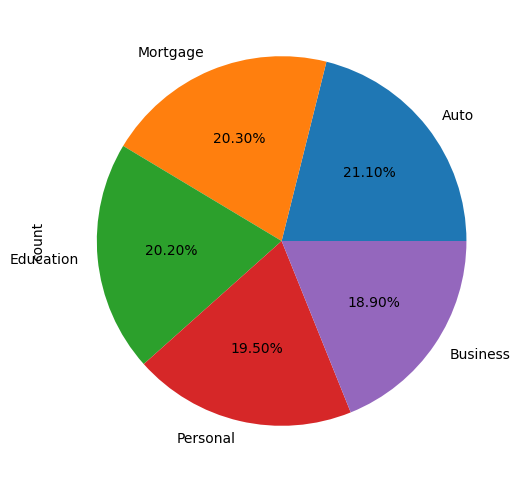

In [105]:
#pie chart for loan type
fig=plt.figure(figsize=(6,6))
df["Loan_Type"].value_counts().plot.pie(autopct="%1.2f%%")

This pie chart displays the distribution of loan purposes among customers. It shows that the Mortgaes are the most common loan type followed by Education,Auto, Business and Personal

<Axes: ylabel='count'>

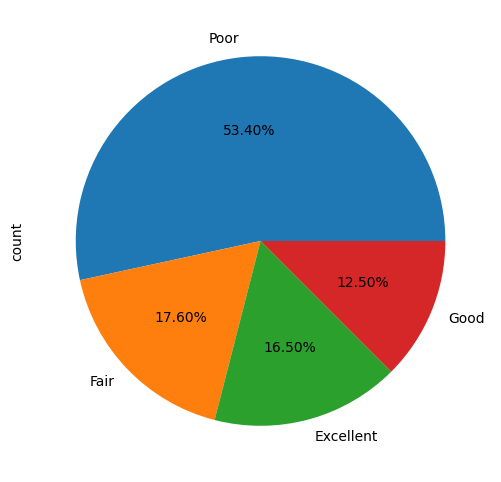

In [106]:
#pie chart for credit score band
fig=plt.figure(figsize=(6,6))
df["Credit_Score_Band"].value_counts().plot.pie(autopct="%1.2f%%")

This pie chart displays the distribution of credict score band among customers. It shows that the most of the customers are with poor credit score band than excellent, fair and good

In [107]:
#numerical columns
num_columns=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Transaction_Frequency"]

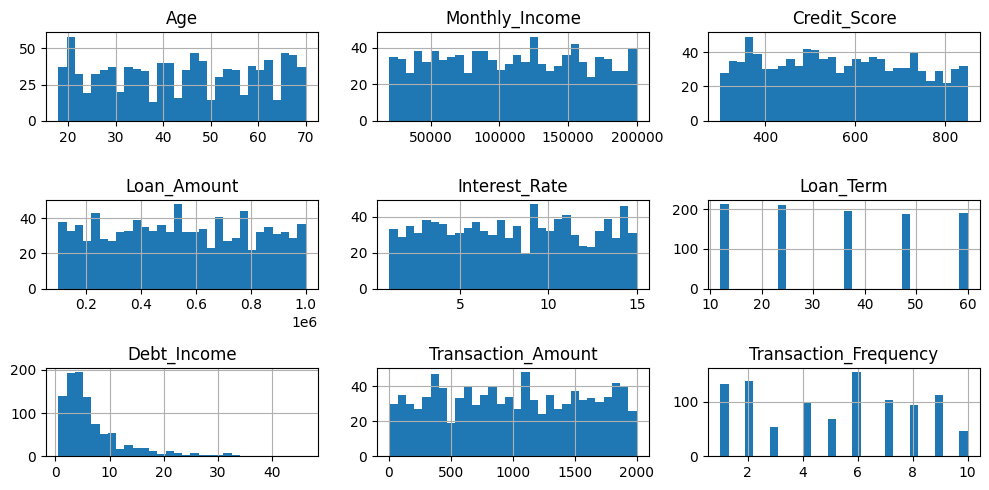

In [108]:
#histplot-distribution of data
df[num_columns].hist(figsize=(10,5),bins=30,layout=(3,3))
plt.tight_layout()
plt.show()

This histplot displays the distribution of numerical columns. It represents that Age, Monthly Income, Credit Score, Loan Amount, Interest Rate, Loan Term, Transaction Amount, Transaction Frequency are symmetric, whereas Debt_Income tends to be positively skewed.

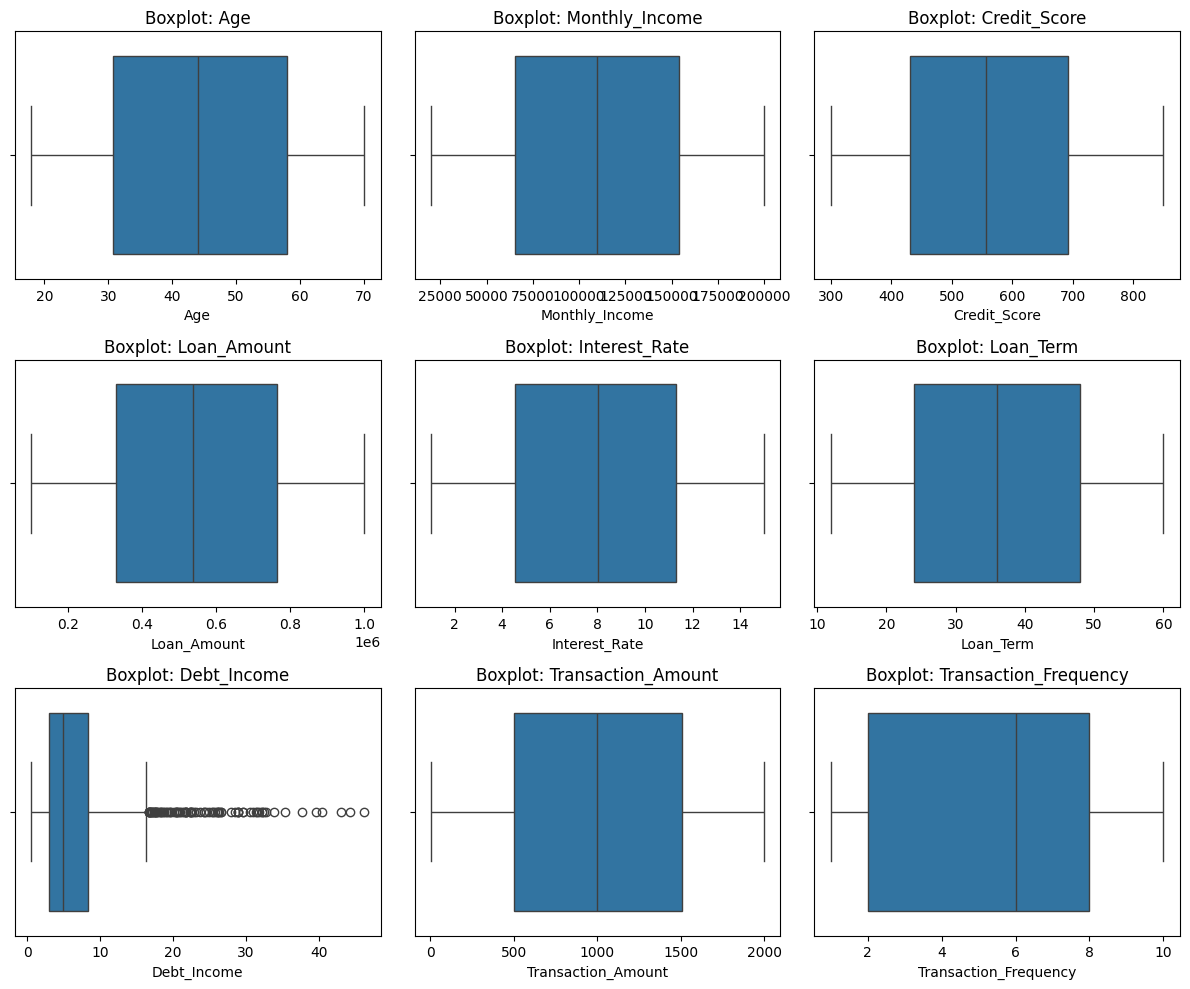

In [109]:
#Boxplot-outlier detection
fig,axes=plt.subplots(3,3,figsize=(12,10))
axes=axes.flatten()
for ax,column in zip(axes,num_columns):
    sb.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

The Boxplot indicates outlier detection, showing that only the Debt_Income feature displays outliers where all other features appear to be free of outliers.

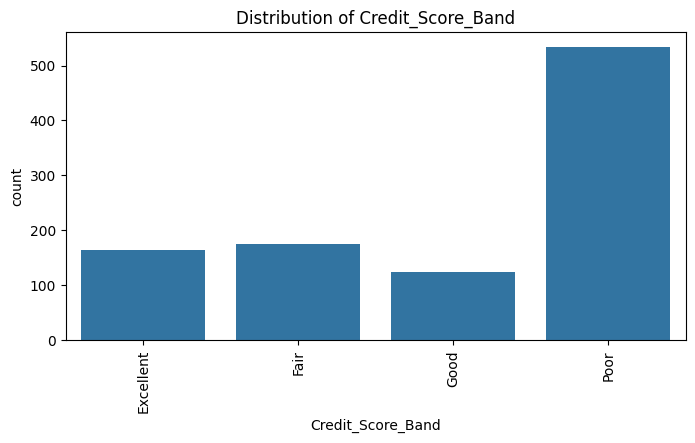

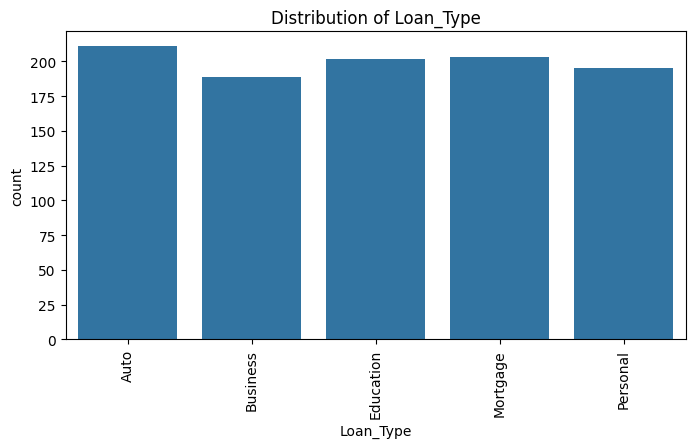

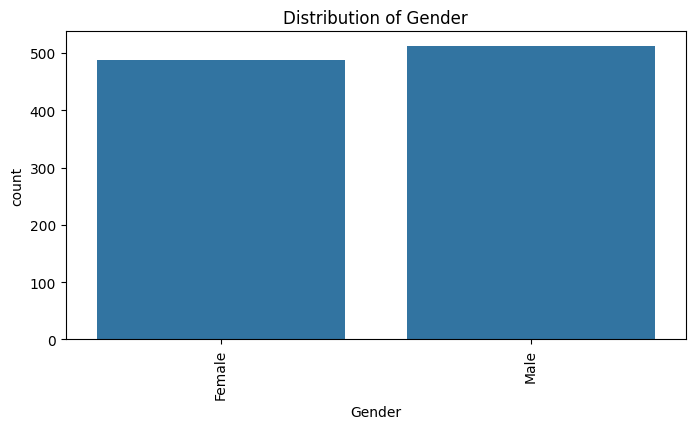

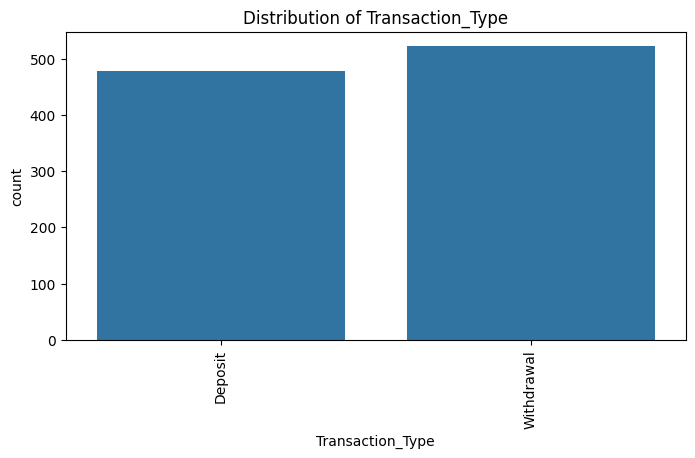

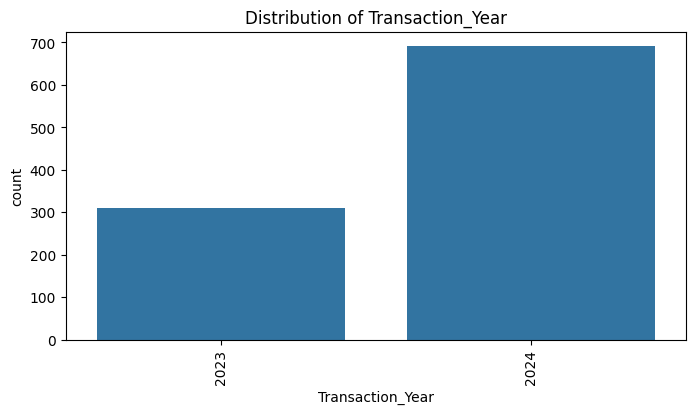

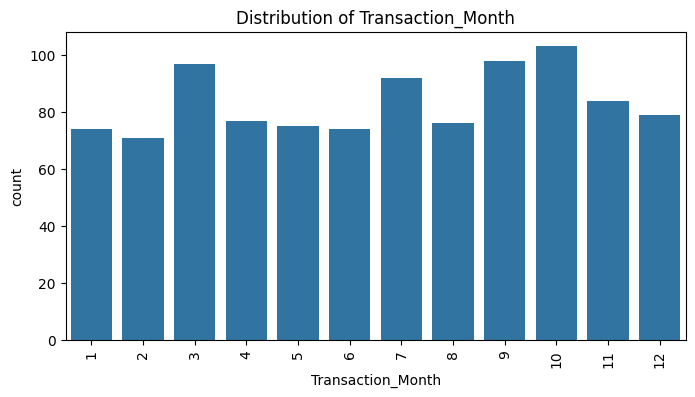

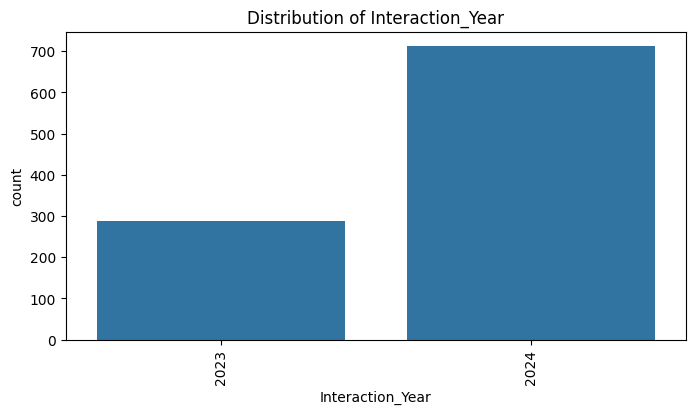

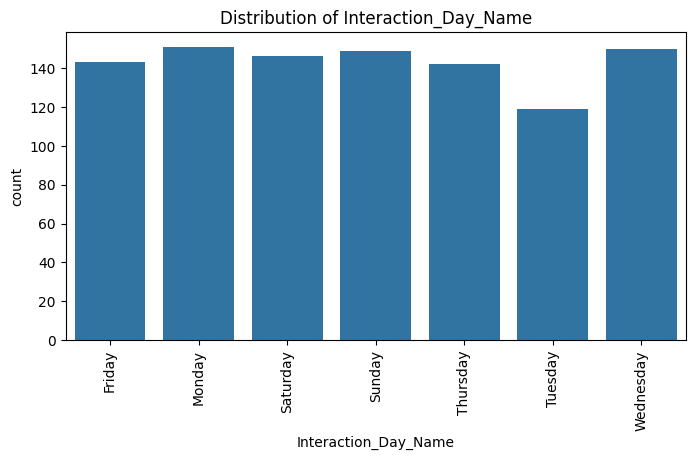

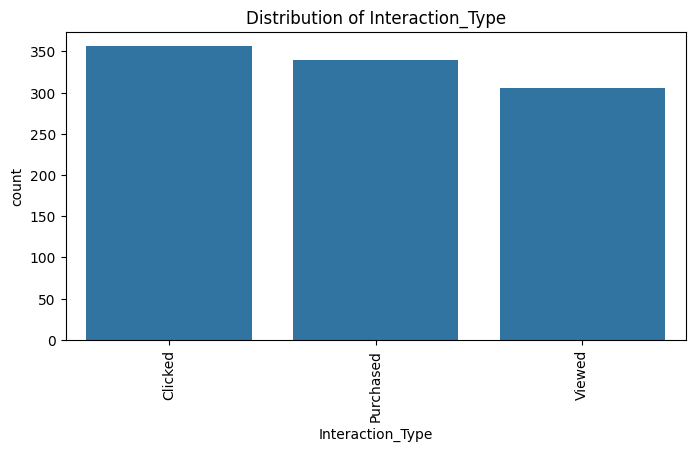

In [110]:
# Categorical variables
cat_columns = ["Credit_Score_Band", "Loan_Type", "Gender", 
               "Transaction_Type", "Transaction_Year", "Transaction_Month", "Interaction_Year", "Interaction_Day_Name", "Interaction_Type"]
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sb.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()


The countplot displays the distribution of categorical features.
- Countplot for distribution of Credit Score Band:
    The plot displays that most of the customers has Poor credict score band compared to Excellent, Fair, Good.
- Countplot for Distribution of Loan Type:
    The Mortgage loan type has the highest count, followed by Education, Auto, Business and Personal loans.
- Countplot for Distribution of Gender:
    More Males have taken loans compared to females.
- Countplot for Distribution of Transaction Type:
    Most of the transactions were Withdrawals compared to Deposits.
- Countplot for Distribution of Transaction Year:
    2024 has the highest transaction count.
- Countplot for Distribution of Transaction Month:
    July has the highest transaction count compared to other months.
- Countplot for Interaction Year:
    2024 shows high number of interactions than 2023.
- Countplot for Distribution of Interaction Day Name:
    Tuesdays has the highest interaction count than other days.
- Countplot for Distribution of Interaction Type
        The counts for clicked and purchased are higher than for viewed.

In [111]:
num_col=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Repayment_Status","Transaction_Frequency"]

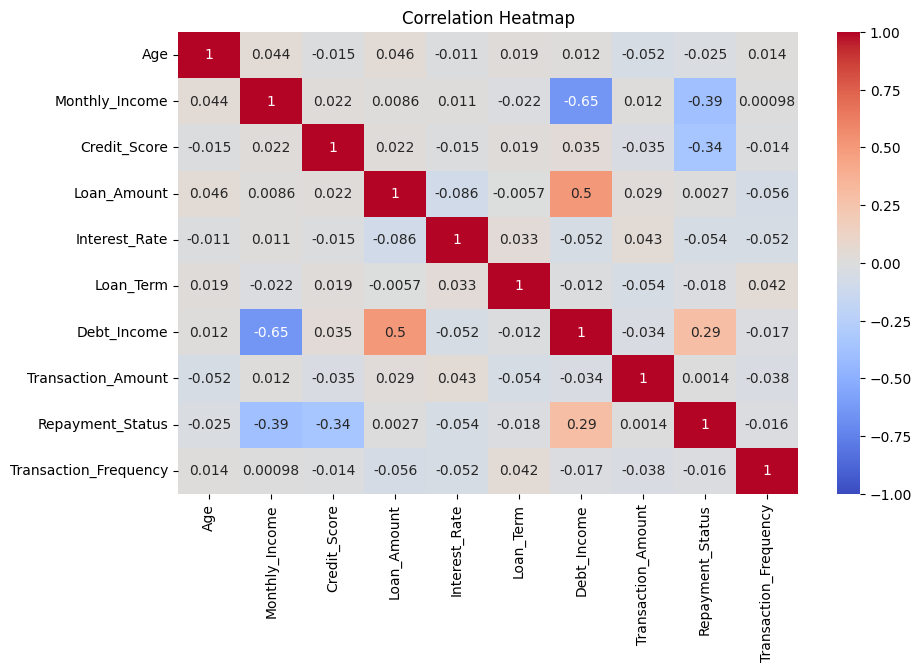

In [112]:
#correlation matrix
co_mat=df[num_col].corr()
plt.figure(figsize=(10, 6))
sb.heatmap(co_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

The heat map displays the relationships between different variables related to loan data. This plot displays that
- The Monthly Income and Debt Income are strong negative correlations.
- The Debt Income and Repayment Status are strong positive correlations.
- The Loan Amount and Debt Income are strong positive correlations.

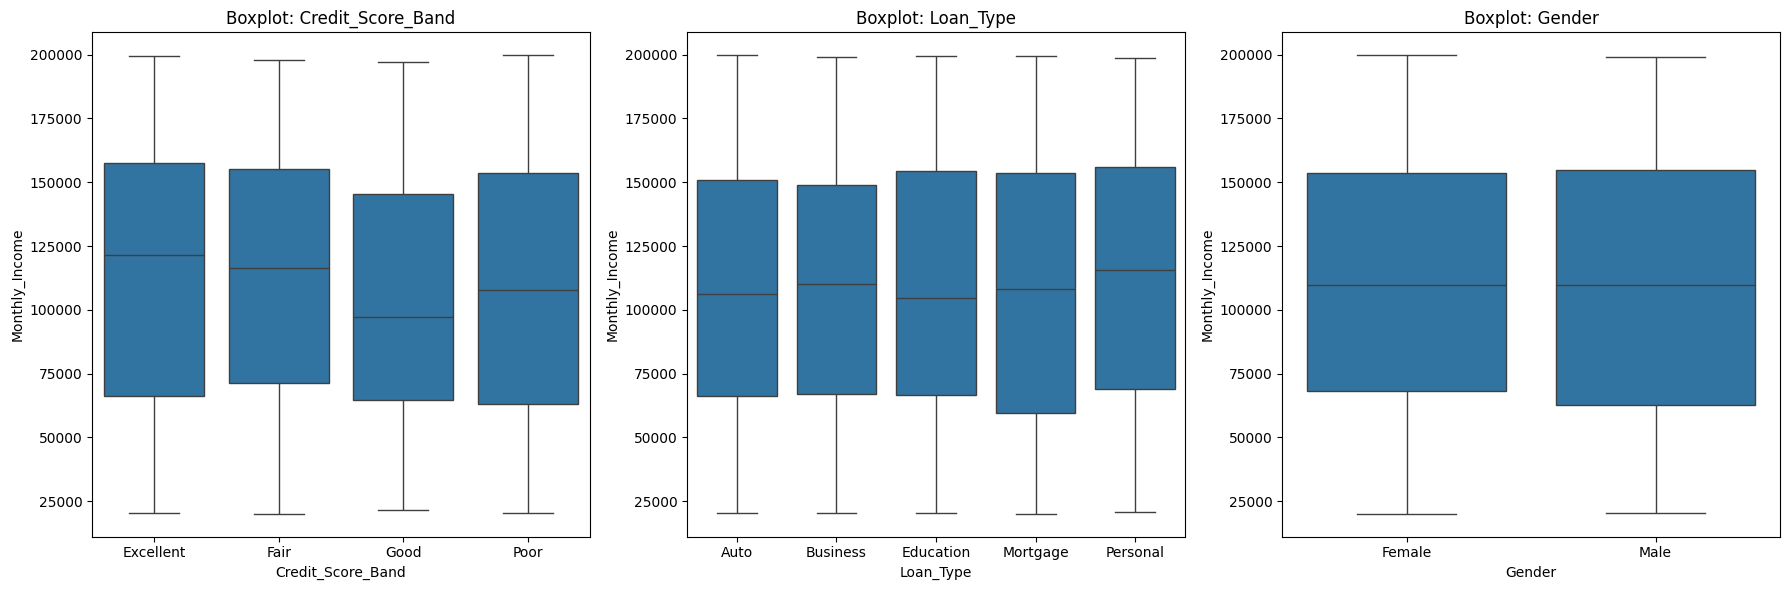

In [113]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
axes=axes.flatten()
for ax,column in zip(axes,['Credit_Score_Band', 'Loan_Type', 'Gender']):
    # sb.violinplot(x=column,y='Monthly_Income',data=df,ax=ax)
    sb.boxplot(x=column, y='Monthly_Income', data=df, ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

- Customers with higher credit scores tend to have higher monthly income regardless of gender or loan type.
- Customers with higher incomes are more likely to have  Mortgage loans.
- Gender has minimal impact on monthly income.

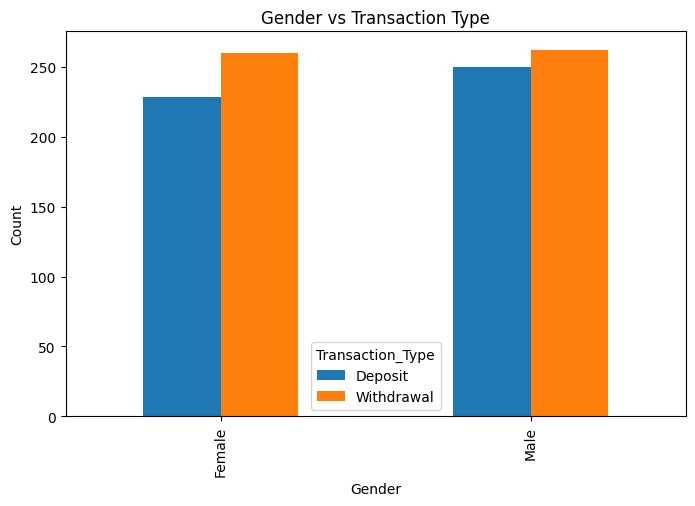

In [114]:
# Crosstab and stacked bar chart for categorical vs categorical
pd.crosstab(df['Gender'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Gender vs Transaction Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


The crosstab shows the distribution of Transaction Types: 
- Male have a higher count of deposit transactions compared to female.
- Female have a higher count of withdrawal transactions compare to male.

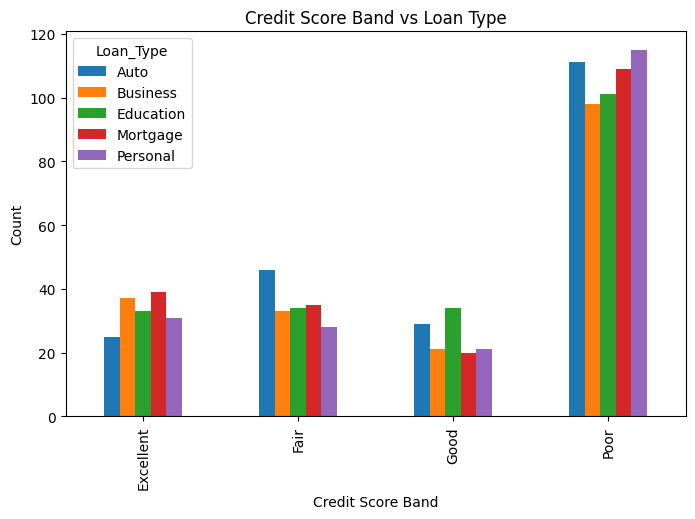

In [115]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Credit_Score_Band'], df['Loan_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Credit Score Band vs Loan Type")
plt.xlabel("Credit Score Band")
plt.ylabel("Count")
plt.show()

The crosstab shows the distribution of Loan Types across different Credit Score Brands: 
- Customer with Poor Credit Score Band has the highest overall number of Loans followed by Excellent, Good and Fair.

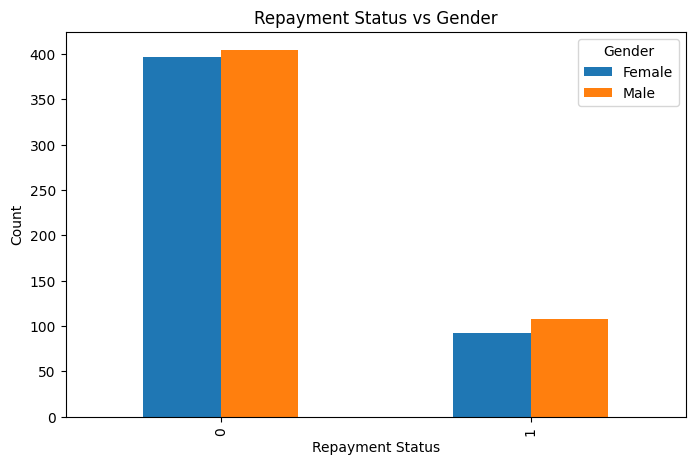

In [116]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Repayment_Status'], df['Gender']).plot(kind='bar', figsize=(8, 5))
plt.title("Repayment Status vs Gender")
plt.xlabel("Repayment Status")
plt.ylabel("Count")
plt.show()

The Crosstab displays the distribution of Repayment Status by Gender:
- Both Female and Male have a similar number of individuals with Repayment Status 0.
- Male have a slightly higher proportion of individuals with Repayment Status 1 compared to Female.

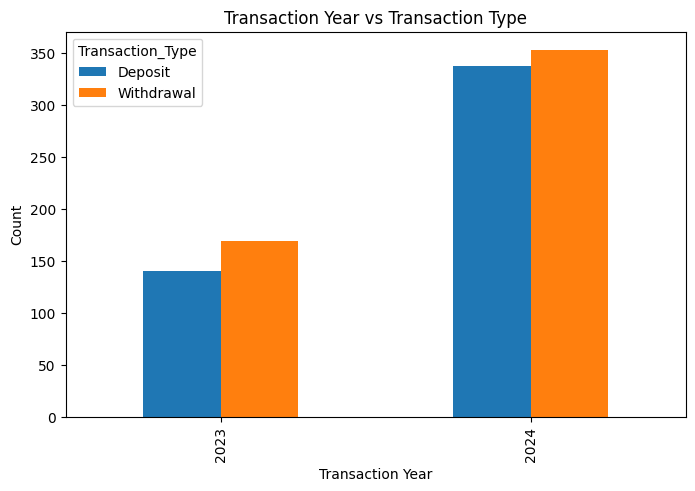

In [117]:
pd.crosstab(df['Transaction_Year'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Transaction Year vs Transaction Type")
plt.xlabel("Transaction Year")
plt.ylabel("Count")
plt.show()

The Crosstab displays the distribution of Transaction Type by Transaction Year:
- In 2024, withdrwal transactions slightly outnumber deposits.
- In 2023, withdrawal exceeds deposits.

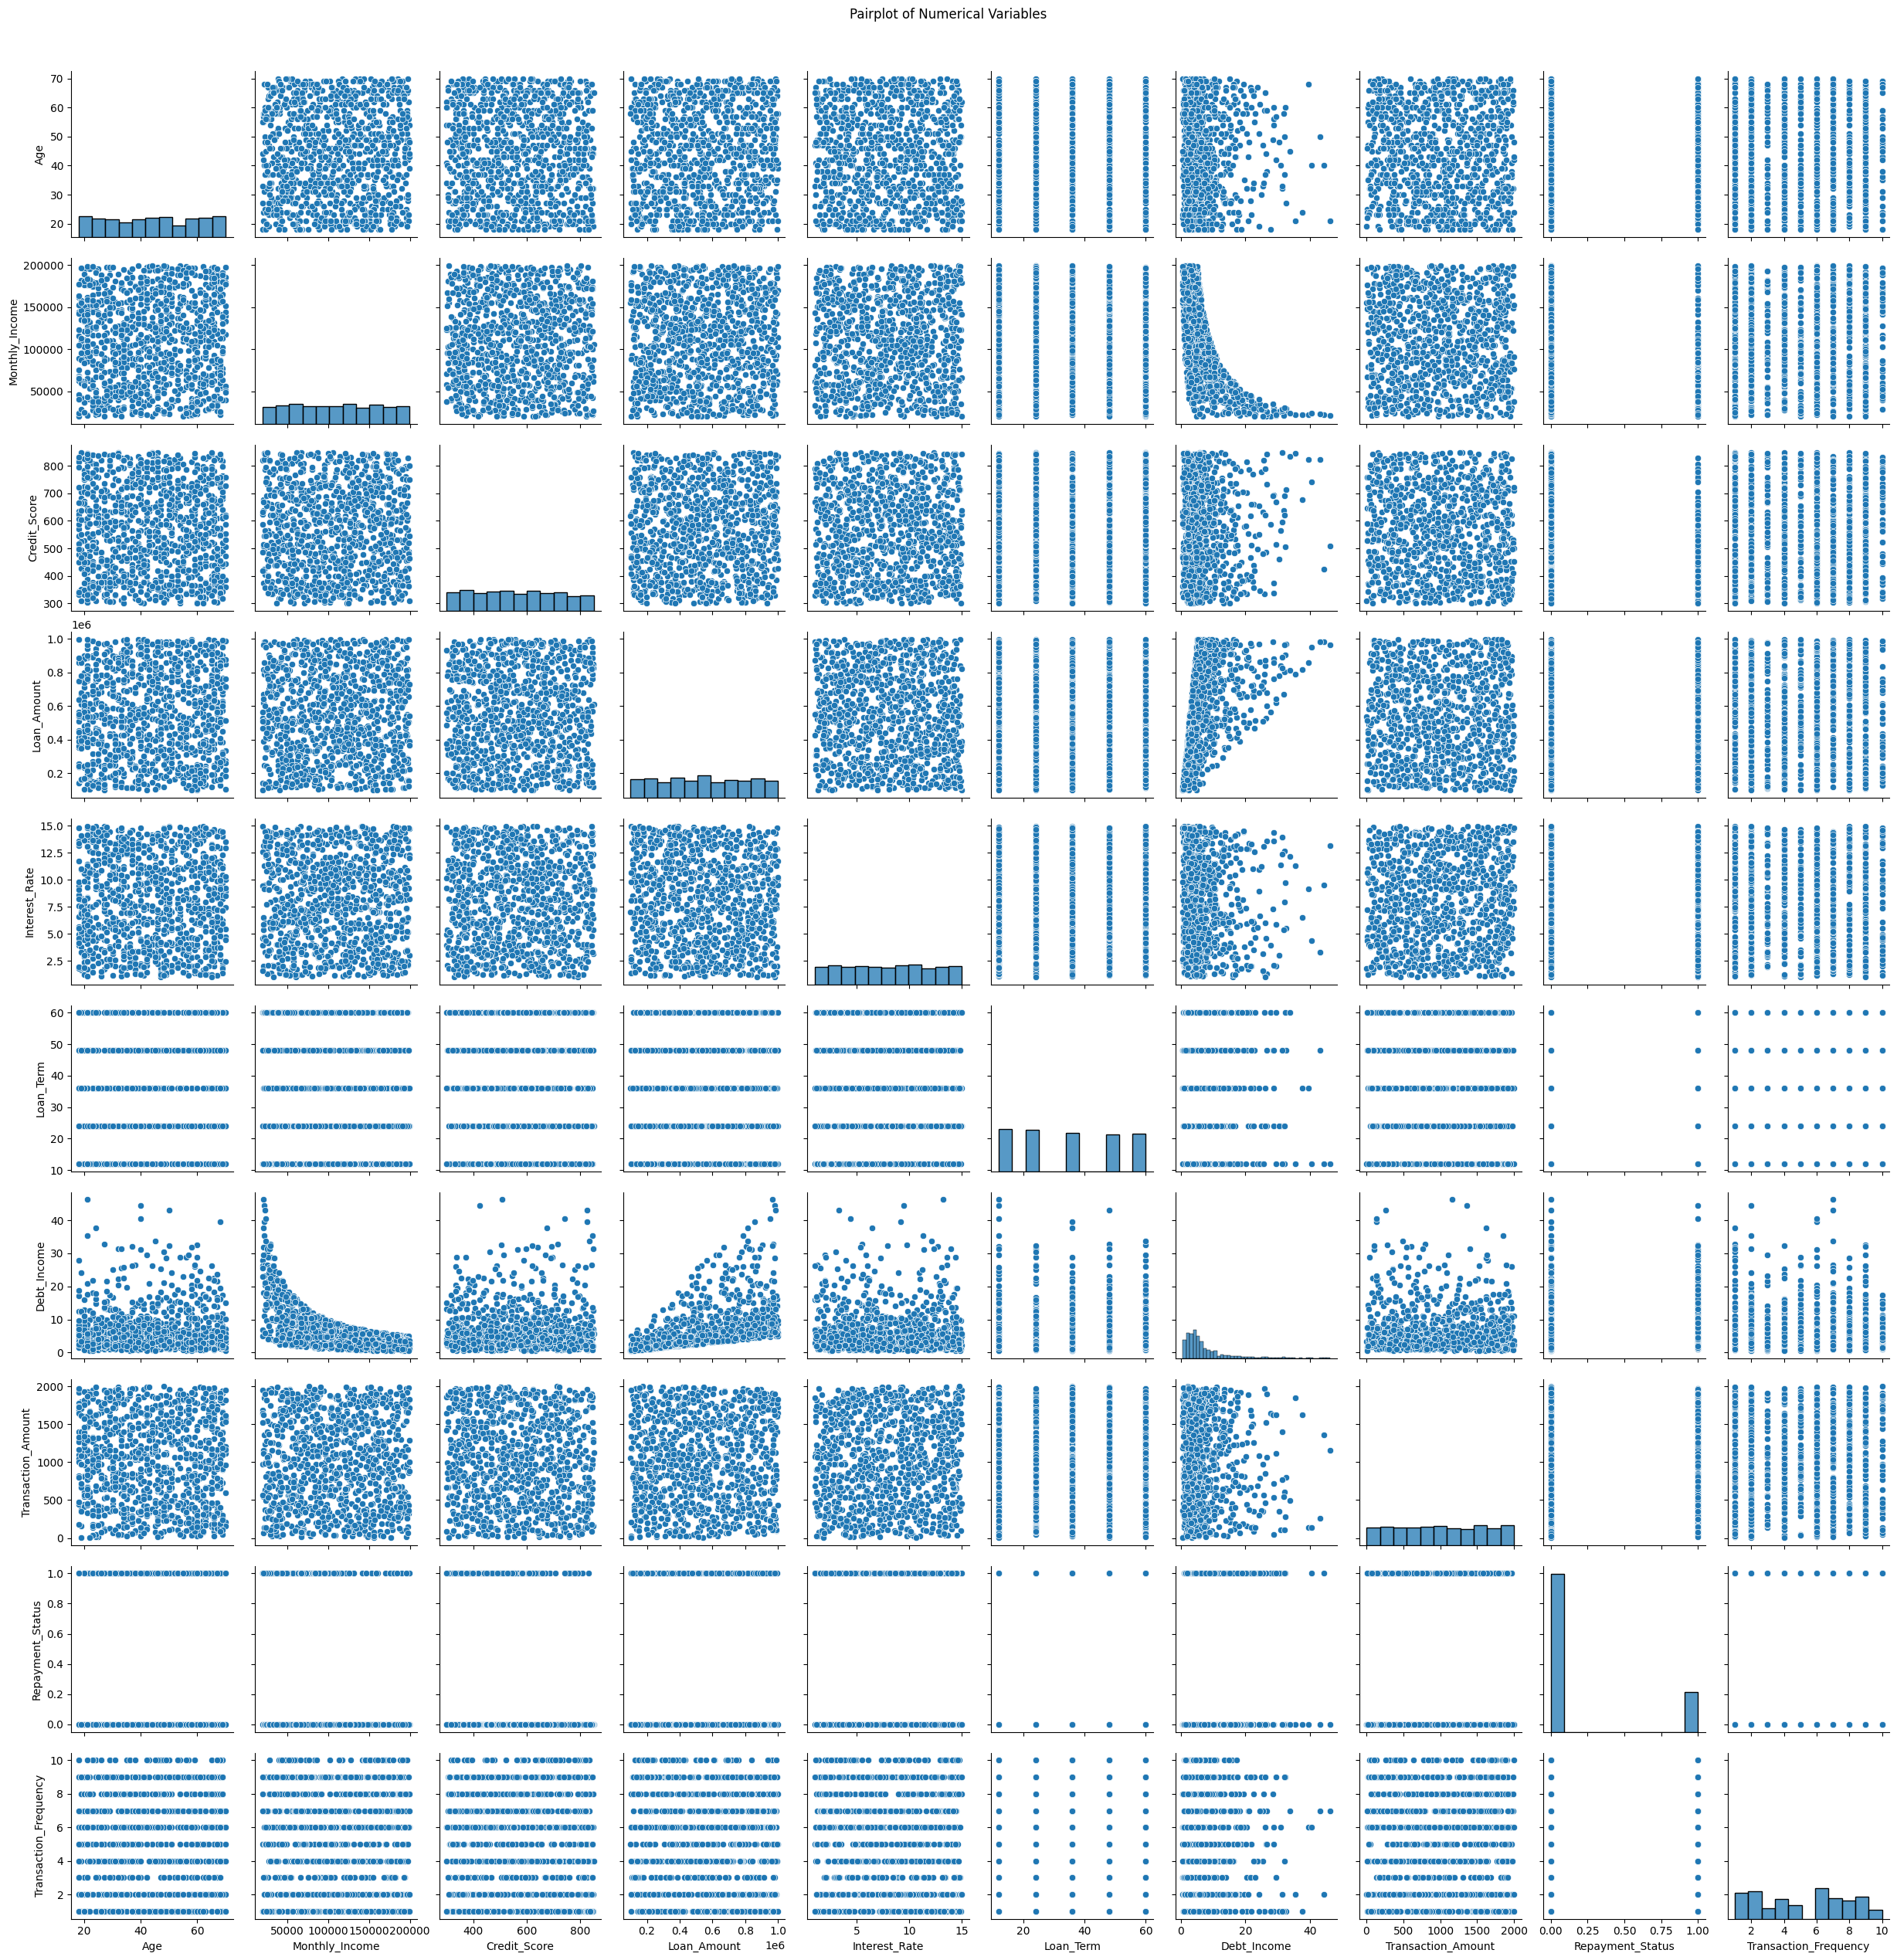

In [118]:
sb.pairplot(df[num_col])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

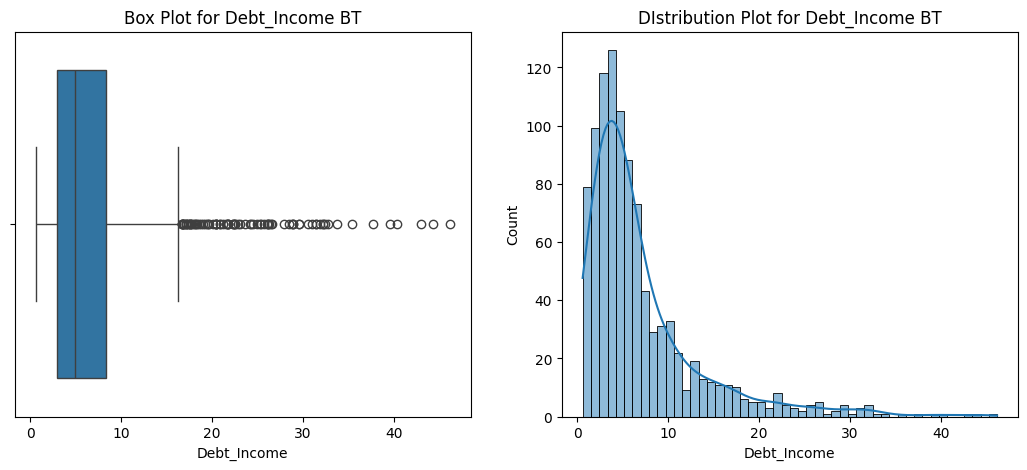

In [119]:
col_to_check_skew=["Debt_Income"]
for i in col_to_check_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sb.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sb.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")


1. Boxplot displays outliers in the Debt Income.
2. Histogram illustrates that the Debt Income is positively skewed.

In [120]:
#function-to check skewness 
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"
        
        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [121]:
check_skew(df,num_columns)

Age Monthly_Income Credit_Score Loan_Amount  \
skewness_value  -0.013796       0.020628     0.092658    0.032539   
skew Type       Symmetric      Symmetric    Symmetric   Symmetric   

               Interest_Rate  Loan_Term        Debt_Income Transaction_Amount  \
skewness_value      0.014296   0.070794           2.357657           0.010942   
skew Type          Symmetric  Symmetric  Positively Skewed          Symmetric   

               Transaction_Frequency  
skewness_value             -0.015486  
skew Type                  Symmetric

Age, Monthly Income, Credit Score, Loan Amount, Interest Rate, Loan Term, Transaction Amount,Transaction Frequency are symmetric, whereas Debt Income is Positively Skewed.

In [124]:
#skewness treatment
df["Debt_To_Income_Log"]=np.log1p(df["Debt_Income"])
df["Debt_To_Income_sqrt"]=np.sqrt(df["Debt_Income"])
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)

In [125]:
print("log",df["Debt_To_Income_Log"].skew())
print("sqrt",df["Debt_To_Income_sqrt"].skew())
print("boxcox",df["Debt_To_Income_box_cox"].skew())

log 0.42312955649093215
sqrt 1.1912250135251354
boxcox 0.018981532213547477


In [126]:
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)
print("boxcox",df["Debt_To_Income_box_cox"].skew())

boxcox 0.018981532213547477


After skewness treatment, the Box-Cox transformation significantly reduced skewness and resulted in a nearly normal distribution, where as the log and sqrt transformations did not have much impact on reducing skewess.

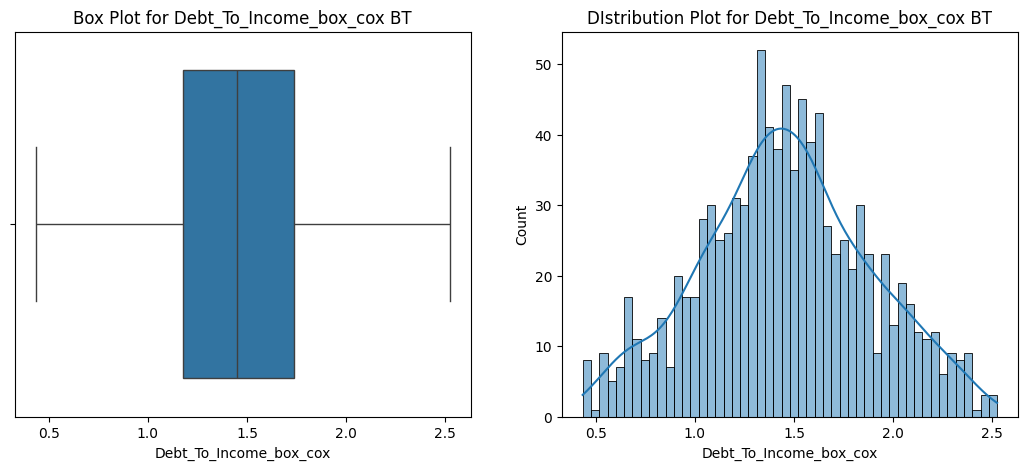

In [127]:
#Plotting after the treatment
treated_skew=["Debt_To_Income_box_cox"]
for i in treated_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sb.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sb.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

After the transformations, both outliers and skewness have been addressed.

In [128]:
df1=df.drop(columns=["Customer_Id"])

## Model Training and Evaluation

### Logistic Regression

In [167]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

y_pred_lr=lr_sm.predict(X_test)

y_pred_lr_proba = lr_sm.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
precision_scr_lr=precision_score(y_test, y_pred_lr)
recall_scr_lr=recall_score(y_test, y_pred_lr)
f1_scr_lr=f1_score(y_test, y_pred_lr)
roc_auc_lr=roc_auc_lr
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

Logistic Regression Accuracy: 0.84
Logistic Regression Precision: 0.573170731707317
Logistic Regression Recall: 0.7833333333333333
Logistic Regression F1-Score: 0.6619718309859155
Logistic Regression ROC-AUC Score: 0.8640972222222223


In [168]:
#checking for imbalanced data
y_smote.value_counts()

Repayment_Status
0    560
1    560
Name: count, dtype: int64

In [169]:
#Hyperparameter Tuning for Logistion Regression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler,LabelEncoder

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [100, 200, 300]
}

scoring = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba=best_model.predict_proba(X_test)[:,1]

accuracy_lr_at=accuracy_score(y_test, y_pred_best)
precision_scr_lr_at=precision_score(y_test, y_pred_best)
recall_scr_lr_at=recall_score(y_test, y_pred_best)
f1_score_lr_at=f1_score(y_test, y_pred_best)
roc_auc_lr_at=roc_auc_score(y_test, y_pred_best_proba)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1-Score:", f1_score(y_test, y_pred_best))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8290786030199164
Best Logistic Regression Accuracy: 0.82
Best Logistic Regression Precision: 0.5340909090909091
Best Logistic Regression Recall: 0.7833333333333333
Best Logistic Regression F1-Score: 0.6351351351351351
Best Logistic Regression ROC-AUC Score: 0.8647916666666666


In [178]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [179]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [177]:
df1.sample(2)

Age  Monthly_Income  Credit_Score Credit_Score_Band  Loan_Amount  \
483   64        78007.72           515              Poor    605969.14   
482   25        32017.29           647              Fair    313237.82   

     Interest_Rate  Loan_Term Loan_Type  Debt_Income  Repayment_Status  ...  \
483          11.80         36      Auto     7.768066                 0  ...   
482          10.65         36      Auto     9.783396                 1  ...   

    Product_Id      Product_Name  Interaction_Date Interaction_Year  \
483       P034  Stock Investment        2024-05-05             2024   
482        P09   Investment Fund        2024-02-10             2024   

    Interaction_Day_Name Interaction_Type Transaction_Frequency  \
483               Sunday           Viewed                     2   
482             Saturday           Viewed                     1   

    Debt_To_Income_box_cox Debt_To_Income_Log Debt_To_Income_sqrt  
483               1.695796           2.171116            2.787125  
482               1.816259           2.378008            3.127842  

[2 rows x 27 columns]

### Decision Tree Classifier

In [180]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X = X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

y_pred_dt=dt_sm.predict(X_test)

y_pred_dt_proba= dt_sm.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)


accuracy_dt=accuracy_score(y_test, y_pred_dt)
precision_scr_dt=precision_score(y_test, y_pred_dt)
recall_scr_dt=recall_score(y_test, y_pred_dt)
f1_scr_dt=f1_score(y_test, y_pred_dt)
roc_auc_dt=roc_auc_dt
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Classifier ROC-AUC Score:", roc_auc_dt)

Decision Tree Accuracy: 0.7866666666666666
Decision Tree Precision: 0.47435897435897434
Decision Tree Recall: 0.6166666666666667
Decision Tree F1-Score: 0.5362318840579711
Decision Tree Classifier ROC-AUC Score: 0.7229166666666667


In [181]:
#Hyperparameter Tunin for Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid_dt,
                            scoring=scoring,
                            cv=5)

grid_search_dt.fit(x_smote,y_smote)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

best_dt_model=grid_search_dt.best_estimator_

y_pred_best_dt=best_dt_model.predict(X_test)
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

accuracy_dt_at=accuracy_score(y_test, y_pred_best_dt)
precision_scr_dt_at=precision_score(y_test, y_pred_best_dt)
recall_scr_dt_at=recall_score(y_test, y_pred_best_dt)
f1_score_dt_at=f1_score(y_test, y_pred_best_dt)
roc_auc_dt_at=roc_auc_score(y_test, y_pred_best_dt_proba)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_best_dt))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_best_dt))
print("Best Decision Tree F1-Score:", f1_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1-Score: 0.8657010233441064
Best Decision Tree Accuracy: 0.7866666666666666
Best Decision Tree Precision: 0.47619047619047616
Best Decision Tree Recall: 0.6666666666666666
Best Decision Tree F1-Score: 0.5555555555555556
Best Decision Tree ROC-AUC Score: 0.7464930555555556


In [182]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [183]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


### Random Forest Classifier

In [184]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

y_pred_rfr=rfr_sm.predict(X_test)

y_pred_rfr_proba = rfr_sm.predict_proba(X_test)[:, 1]

accuracy_rf=accuracy_score(y_test, y_pred_rfr)
precision_scr_rf=precision_score(y_test, y_pred_rfr)
recall_scr_rf=recall_score(y_test, y_pred_rfr)
f1_scr_rf=f1_score(y_test, y_pred_rfr)
roc_auc_rf=roc_auc_score(y_test, y_pred_rfr_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfr))
print("Random Forest Precision:", precision_score(y_test, y_pred_rfr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rfr))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rfr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rfr_proba))

Random Forest Accuracy: 0.8666666666666667
Random Forest Precision: 0.6923076923076923
Random Forest Recall: 0.6
Random Forest F1-Score: 0.6428571428571429
Random Forest ROC-AUC: 0.8494444444444444


In [186]:
df1.sample(2)

Age  Monthly_Income  Credit_Score Credit_Score_Band  Loan_Amount  \
327   53       128625.23           810         Excellent    679786.33   
166   39        66693.45           516              Poor    457037.09   

     Interest_Rate  Loan_Term Loan_Type  Debt_Income  Repayment_Status  ...  \
327          11.20         36  Mortgage     5.285015                 0  ...   
166           3.39         12      Auto     6.852803                 1  ...   

    Product_Id            Product_Name  Interaction_Date Interaction_Year  \
327       P014  Certificate of Deposit        2024-04-03             2024   
166        P04           Personal Loan        2023-11-28             2023   

    Interaction_Day_Name Interaction_Type Transaction_Frequency  \
327            Wednesday           Viewed                     6   
166              Tuesday           Viewed                     8   

    Debt_To_Income_box_cox Debt_To_Income_Log Debt_To_Income_sqrt  
327               1.489050           1.838168            2.298916  
166               1.629143           2.060871            2.617786  

[2 rows x 27 columns]

In [187]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [188]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[39],
    "Monthly_Income":[66693.45],
    "Credit_Score":[516],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[457037.09],
    "Interest_Rate":[3.39],
    "Loan_Term":[12],
    "Loan_Type":["Auto"],
    "Debt_Income":[6.852803]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [191]:
#Hyperparameter Tuning For Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

param_grid_rf={
    "n_estimators": [100, 200, 300],
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid_rf,
                            scoring=scoring,
                            cv=5)

grid_search_rf.fit(x_smote,y_smote)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

best_rf_model=grid_search_rf.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_rf_at=accuracy_score(y_test, y_pred_best_rf)
precision_scr_rf_at=precision_score(y_test, y_pred_best_rf)
recall_scr_rf_at=recall_score(y_test, y_pred_best_rf)
f1_score_rf_at=f1_score(y_test, y_pred_best_rf)
roc_auc_rf_at=roc_auc_score(y_test, y_pred_best_rf_proba)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_best_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_best_rf))
print("Best Random Forest F1-Score:", f1_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1-Score: 0.9042156649475718
Best Random Forest Accuracy: 0.8633333333333333
Best Random Forest Precision: 0.6727272727272727
Best Random Forest Recall: 0.6166666666666667
Best Random Forest F1-Score: 0.6434782608695652
Best Random Forest ROC-AUC Score: 0.8497916666666667


### Gradient Boosting Classifier

In [63]:
#Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credict_Score","Credict_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credict_Score_Band"] = le_credict.fit_transform(X["Credict_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

y_pred_gb=gb_sm.predict(X_test)

y_pred_prob_gbb = gb_sm.predict_proba(X_test)[:, 1]

accuracy_gb=accuracy_score(y_test, y_pred_gb)
precision_scr_gb=precision_score(y_test, y_pred_gb)
recall_scr_gb=recall_score(y_test, y_pred_gb)
f1_scr_gb=f1_score(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_prob_gbb)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_pred_prob_gbb))

Gradient Boosting Accuracy: 0.8433333333333334
Gradient Boosting Precision: 0.5409836065573771
Gradient Boosting Recall: 0.6346153846153846
Gradient Boosting F1-Score: 0.584070796460177
Gradient Boosting ROC-AUC: 0.8306451612903225


In [66]:
#Hyperparameter Tuning for Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credict_Score","Credict_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credict_Score_Band"] = le.fit_transform(X["Credict_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

param_grid_gb={
    "max_depth":[2,3,4],
    "learning_rate":[0.05,0.1],
    "n_estimators":[100,200],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

scoring=make_scorer(f1_score)

grid_search_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                            param_grid=param_grid_gb,
                            scoring=scoring,
                            cv=5)

grid_search_gb.fit(x_smote,y_smote)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score:", grid_search_gb.best_score_)

best_gb_model=grid_search_gb.best_estimator_

y_pred_best_gb=best_gb_model.predict(X_test)
y_pred_best_gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

accuracy_gb_at=accuracy_score(y_test, y_pred_best_gb)
precision_scr_gb_at=precision_score(y_test, y_pred_best_gb)
recall_scr_gb_at=recall_score(y_test, y_pred_best_gb)
f1_score_gb_at=f1_score(y_test, y_pred_best_gb)
roc_auc_gb_at=roc_auc_score(y_test, y_pred_best_gb_proba)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Precision:", precision_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Recall:", recall_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting F1-Score:", f1_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_gb_proba))

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score: 0.8936216141472448
Best Gradient Boosting Accuracy: 0.8366666666666667
Best Gradient Boosting Precision: 0.5272727272727272
Best Gradient Boosting Recall: 0.5576923076923077
Best Gradient Boosting F1-Score: 0.5420560747663551
Best Gradient Boosting ROC-AUC Score: 0.8160669975186102


In [67]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [65]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


### Model Accuracy Comparison: Before and After Tuning

In [70]:
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision TreeClassifier","Random Forest Classifier","Gradient Boosting Classifier"],

    "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_gb],

    "Accuracy after Tuning":[accuracy_lr_at,accuracy_dt_at,accuracy_rf_at,accuracy_gb_at]
})
models

Model  Accuracy  Accuracy after Tuning
0           Logistic Regression  0.726667               0.726667
1       Decision TreeClassifier  0.720000               0.766667
2      Random Forest Classifier  0.846667               0.843333
3  Gradient Boosting Classifier  0.843333               0.836667

Based on the comparison, the Random Forest Classifier has the highest accuracy at approximately 84%, indicating that it is the best-trained model compared to others.

In [161]:
#saving the Random Forest Classifier model using pickle, as it shows the highest accuracy
import pickle

with open("rf_cl.pkl","wb") as f:
    pickle.dump(rfr_sm,f)

with open("l_e_credict.pkl","wb") as f:
    pickle.dump(le_credict,f)

with open("l_e_loan.pkl","wb") as f:
    pickle.dump(le_loan,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)


### Unsupervised Learning

In [83]:
df

Customer_Id  Age  Monthly_Income  Credit_Score Credit_Score_Band  \
0          C097   26        82933.89           772         Excellent   
1          C031   60       132759.78           331              Poor   
2           C02   56        41564.78           340              Poor   
3          C053   54       183819.31           354              Poor   
4          C022   59        93222.79           364              Poor   
..          ...  ...             ...           ...               ...   
995        C039   67       102838.23           747         Excellent   
996        C072   32       120985.07           353              Poor   
997        C069   57       138636.12           316              Poor   
998        C036   56        63790.76           692              Good   
999        C010   28       113160.79           835         Excellent   

     Loan_Amount  Interest_Rate  Loan_Term Loan_Type  Debt_Income  ...  \
0      384967.32           4.51         48  Business     4.641858  ...   
1      437328.52          13.18         24  Mortgage     3.294134  ...   
2      268724.16           9.61         24      Auto     6.465189  ...   
3      110086.83          11.38         12  Personal     0.598886  ...   
4      216857.71           4.81         36      Auto     2.326231  ...   
..           ...            ...        ...       ...          ...  ...   
995    768509.89          10.47         36  Mortgage     7.472998  ...   
996    814363.02           1.88         24  Personal     6.731103  ...   
997    404114.72          12.30         36  Personal     2.914931  ...   
998    371399.73           3.17         36  Personal     5.822156  ...   
999    227606.61           2.19         24  Mortgage     2.011356  ...   

                   Product_Name Interaction_Date Interaction_Year  \
0                   Credit Card       2024-08-12             2024   
1              Checking Account       2024-06-28             2024   
2             Recurring Deposit       2023-11-07             2023   
3               Retirement Plan       2024-03-03             2024   
4    High-Yield Savings Account       2024-08-29             2024   
..                          ...              ...              ...   
995               Fixed Deposit       2023-09-26             2023   
996        Business Credit Line       2023-10-11             2023   
997              Long-Term Loan       2024-06-13             2024   
998          Retirement Savings       2024-05-20             2024   
999             Short-Term Loan       2024-04-17             2024   

     Interaction_Day_Name Interaction_Type Transaction_Frequency  \
0                  Monday          Clicked                     7   
1                  Friday           Viewed                     9   
2                 Tuesday          Clicked                     8   
3                  Sunday        Purchased                     3   
4                Thursday        Purchased                     4   
..                    ...              ...                   ...   
995               Tuesday           Viewed                     5   
996             Wednesday           Viewed                     4   
997              Thursday          Clicked                    10   
998                Monday          Clicked                     3   
999             Wednesday        Purchased                     5   

     Debt_To_Income_box_cox  Transaction_Type_Encoded KMeans_Cluster  \
0                  1.491762                         1              4   
1                  1.285499                         1              8   
2                  1.693329                         1              7   
3                  0.450462                         0              2   
4                  1.083324                         0              2   
..                      ...                       ...            ...   
995                1.781268                         1              4   
996                1.717831 

Silhouette Score for kmeans: 0.38062100240111
Davies-Bouldin Index for kmeans: 0.8561336579525978


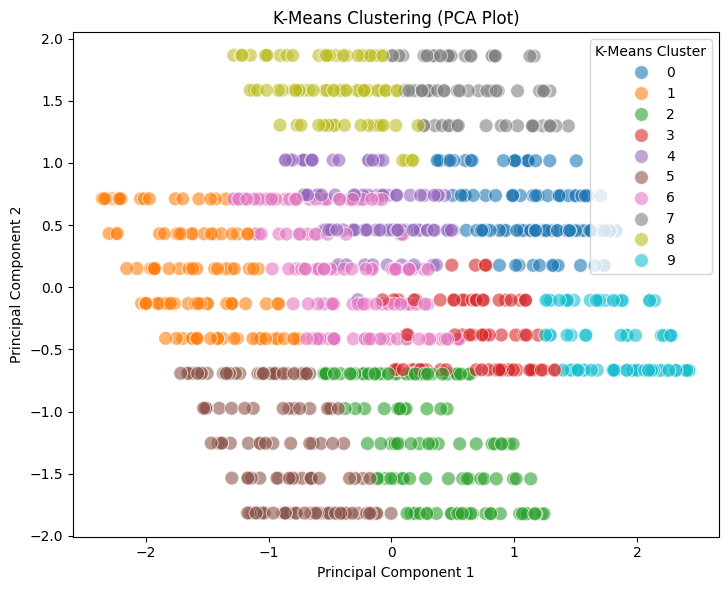

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

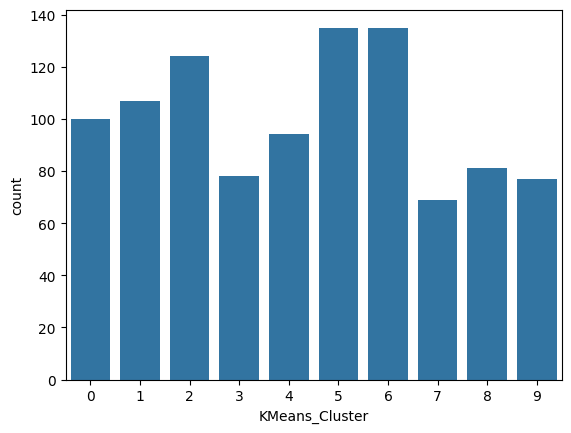

In [88]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pickle

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_kmean = StandardScaler()
f_s = scaler_kmean.fit_transform(feature)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(f_s)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(f_s, k_means_clusters)
dbi_kmeans = davies_bouldin_score(f_s, k_means_clusters)

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="KMeans_Cluster", data=df)

In [94]:
# Save models
with open('scaler_kmean.pkl', 'wb') as f:
    pickle.dump(scaler_kmean, f)
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('l_e_t_t.pkl', 'wb') as f:
    pickle.dump(l_e_t_t, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = l_e_t_t.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler_kmean.transform(input_data)
    
    cluster = kmeans.predict(scaled_input_data)
    
    return cluster[0]

Transaction_Amount = 145.79
Transaction_Frequency = 7
Transaction_Type = "Withdrawal"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler_kmean, kmeans, l_e_t_t)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 4


In [93]:
df[["Customer_Id","Transaction_Frequency","Transaction_Amount","Transaction_Type","KMeans_Cluster"]]

Customer_Id  Transaction_Frequency  Transaction_Amount Transaction_Type  \
0          C097                      7              145.79       Withdrawal   
1          C031                      9              730.57       Withdrawal   
2           C02                      8             1760.00       Withdrawal   
3          C053                      3             1378.46          Deposit   
4          C022                      4             1132.32          Deposit   
..          ...                    ...                 ...              ...   
995        C039                      5              132.66       Withdrawal   
996        C072                      4             1712.86       Withdrawal   
997        C069                     10             1355.83          Deposit   
998        C036                      3              369.75          Deposit   
999        C010                      5              632.03       Withdrawal   

     KMeans_Cluster  
0                 4  
1                 8  
2                 7  
3                 2  
4                 2  
..              ...  
995               4  
996               0  
997               6  
998               5  
999               4  

[1000 rows x 5 columns]

Silhouette Score for dbscan: 0.3529743972847683
Davies-Bouldin Index for dbscan: 1.3154697855661093


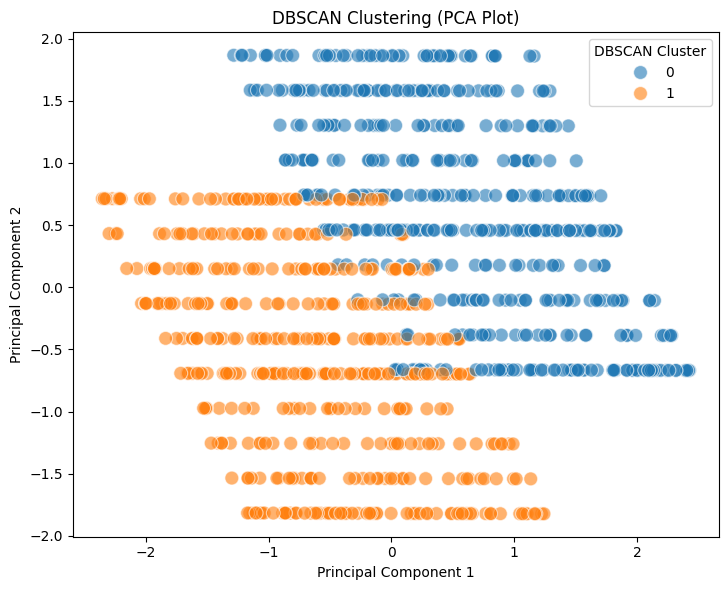

<Axes: xlabel='DBSCAN_Cluster', ylabel='count'>

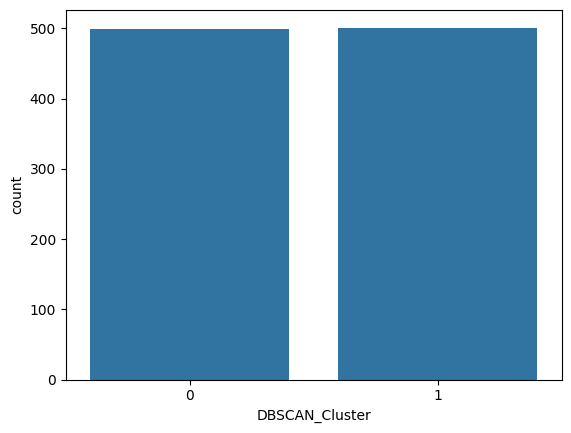

In [80]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_dbscan = StandardScaler()
f_s = scaler_dbscan.fit_transform(feature)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(f_s)
df['DBSCAN_Cluster'] = dbscan_clusters

if len(set(dbscan_clusters))>1:
    silhouette_avg_dbscan = silhouette_score(f_s, dbscan_clusters)
    print(f'Silhouette Score for dbscan: {silhouette_avg_dbscan}')
    dbi_dbscan = davies_bouldin_score(f_s, dbscan_clusters)
    print(f'Davies-Bouldin Index for dbscan: {dbi_dbscan}')
else:
    print("Only 1 Cluster found")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('DBSCAN Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="DBSCAN_Cluster", data=df)

- KMeans outperforms DBscan in terms of cluster distictiveness and separation.
- The Silhouette Score of KMeans reflects better cluster quality compared to Dbscan
- The Davies-Bouldin Index for KMeans indicates better separation when compared to DBscan's score. 

### Product Recommendations

## K-Nearest Neighbors Algorithm

In [274]:
#KNN BASIC 
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)


def recommend_products(customer_id, model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'C09' 
recommended_products = recommend_products(Customer_Id, model, df, product_mapping, n=5)
print(recommended_products)

predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
  Product_Id               Product_Name
0       P018                   Car Loan
1       P032                Credit Line
2       P012             Education Loan
3       P050               Tax Planning
4       P027  Wealth Management Service


In [225]:
with open("knn_pro.pkl","wb") as f:
    pickle.dump(model,f)

In [188]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [189]:
precision_at_k(predictions)

0.7224014336917564

The Precision at K score indicates that the majority of recommendation are relevant, reflecting a strong performance in the recommendation system.

In [190]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [191]:
recall_at_k(predictions)

0.7224014336917564

The Recall at K score indicates that the recommemdation system successfully captures a majority of relevant items in its top recommendations. 

In [192]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [193]:
mean_average_precision(predictions)

0.03561949828359088

In [194]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']
        
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [195]:
ndcg_at_k(predictions)

0.923754420640396

The Normalized Discounted Cumulative Gain score indicates a strong performance of the recommendation system at ranking relevant items.

### Hyperparameter Tuning

In [220]:
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

param_grid={
    "k":[5,10,15],
    "sim_options":{"name":["cosine","msd","pearson"],
    "user_based":[True,False]}
}

gs=GridSearchCV(KNNBasic,param_grid,measures=["rmse"],cv=3)
gs.fit(data)

best_knn_model = gs.best_estimator["rmse"]
best_knn_model.fit(trainset)


def recommend_products(customer_id, best_knn_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [best_knn_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011' 
recommended_products = recommend_products(Customer_Id, best_knn_model, df, product_mapping, n=5)
print(recommended_products)

predictions = best_knn_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

In [221]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()
precision_at_k(predictions)

0.650886524822695

In [222]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall
recall_at_k(predictions)

0.650886524822695

In [223]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions
mean_average_precision(predictions)

0.026497750705120077

In [224]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']
        
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()
ndcg_at_k(predictions)

0.9062810999987466

## Singular Value Decomposition

In [200]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

svd_model = SVD()
svd_model.fit(trainset)


def recommend_products(customer_id, svd_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [svd_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011' 
recommended_products = recommend_products(Customer_Id, svd_model, df, product_mapping, n=5)
print(recommended_products)

predictions = svd_model.test(testset)

  Product_Id               Product_Name
0       P029            Savings Account
1       P033        Investment Advisory
2       P018                   Car Loan
3       P017            Investment Fund
4       P045  Foreign Exchange Services


In [201]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()


In [208]:
precision_at_k(predictions)

0.6477777777777778

The Precision at K score indicates that the majority of recommendation are relevant, reflecting strong performance in the recommendation system. However, the acuracy is lower compared to the KNN Basic model.

In [203]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall


In [207]:
recall_at_k(predictions)

0.6477777777777778

The Recall at K score indicates that the recommemdation system successfully captures a majority of relevant items in its top recommendations. However, the acuracy is lower compared to the KNN Basic model. 

In [205]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions


In [206]:
mean_average_precision(predictions)

0.030957194992580594

In [209]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        # Sort by estimated rating and get the top-k recommendations
        user_df = user_df.nlargest(k, 'est')

        # Calculate relevance for the top-k recommendations
        user_df['relevance'] = user_df['true_r']
        
        # Calculate ideal DCG
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        # Calculate actual DCG
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        # Return NDCG for the user
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    # Compute NDCG for each user and return the average
    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()


In [210]:
ndcg_at_k(predictions)

0.9160234766498387

The Normalized Discounted Cumulative Gain score indicates strong performance in ranking relevant itemss. This reflects the system's ability to effectively prioritize the most relevant recommendations, enhancing user satisfaction and leading to a better overall experience.